In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataSet = load_digits()

In [3]:
X = dataSet['data']
Y = dataSet['target']

In [4]:
#  数据集维度为1797 * 64 转换成1797 * 8 * 8

new_X = X.reshape(-1, 8,8)

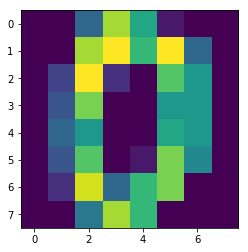

In [5]:
# 未经PCA降维的 8 * 8　图像
plt.imshow(new_X[0])

In [6]:
print(Y[10])

0


In [25]:
meanVals = np.mean(X, axis=0)  # np.mean 求出每列的平均值meanVals
meanRemoved = X-meanVals  # 每一列特征值减去该列的特征值均值
# 计算协方差矩阵，除数n-1是为了得到协方差的 无偏估计
# cov(X,0) = cov(X) 除数是n-1(n为样本个数)
# cov(X,1) 除数是n
covMat = np.cov(meanRemoved, rowvar=0)  # cov 计算协方差的值,
# np.mat 是用来生成一个矩阵的
# 保存特征值(eigvals)和对应的特征向量(eigVects)
eigvals, eigVects = np.linalg.eig(np.mat(covMat))  # linalg.eig 计算的值是矩阵的特征值，保存在对应的矩阵中
eigValInd = np.argsort(eigvals)  # argsort 对特征值进行排序，返回的是数值从小到大的索引值

index = np.argsort(eigvals)

In [143]:
top_k_Vects = eigVects[index[-64:]]  # 获取top个特征值最大的特征向量
top_k_Vects.shape

(64, 64)

In [144]:
pca_X = X * top_k_Vects.T  # 降维之后的数据集
pca_X.shape

(1797, 64)

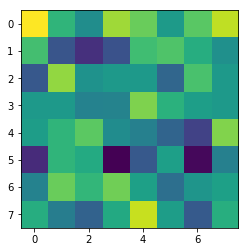

In [103]:
# PCA降维之后的图片
image_pca_X = np.array(pca_X).reshape(-1,8,8)
plt.imshow(image_pca_X[10])

In [145]:
# 矩阵还原

norm_X = pca_X * top_k_Vects
image_norm_X = np.array(norm_X).reshape(1797, 8,8)
norm_X.shape

(1797, 64)

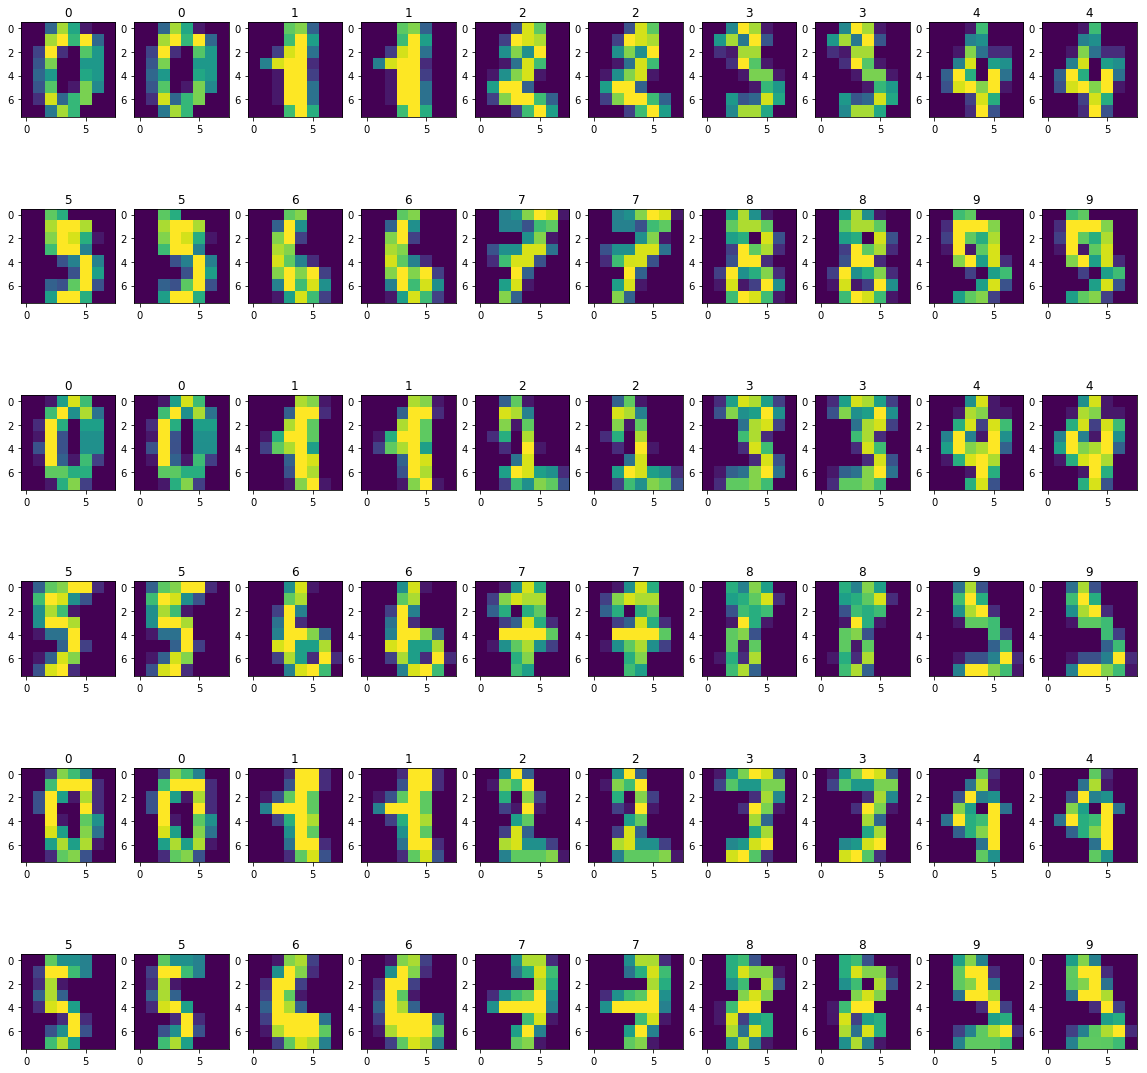

In [153]:
plt.figure(figsize=(20,20))
for i in range(0, 30):
    label = Y[i]
    plt.subplot(6,10,i*2 + 1)
    plt.title(label)
    plt.imshow(new_X[i])
    plt.subplot(6,10,i*2 + 2)
    plt.title(label)
    plt.imshow(image_norm_X[i])